#Download Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#!wget https://www.dropbox.com/s/rbajpdlh7efkdo1/male_female_face_images.zip
!unzip -q /content/drive/MyDrive/GAN/male_female_face_images.zip

In [ ]:
!pip install -q --upgrade torch_snippets
from torch_snippets import *
import torchvision
from torchvision import transforms
import torchvision.utils as vutils
import cv2, numpy as np, pandas as pd
device = "cuda" if torch.cuda.is_available() else "cpu"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 60.1 MB/s eta 0:

The `cv2.CascadeClassifier` is a class provided by the OpenCV library for object detection using Haar cascades. Haar cascades are machine learning models trained to detect specific objects, such as faces, in images or video streams.

The `cv2.data.haarcascades` part of the code refers to a predefined path in OpenCV that contains XML files for various pre-trained Haar cascades. These XML files define the structure and parameters of the trained cascade classifiers.

By concatenating `cv2.data.haarcascades` with the filename `'haarcascade_frontalface_default.xml'`, we obtain the full path to the XML file containing the pre-trained Haar cascade for detecting frontal faces. This cascade classifier is specifically trained to detect human faces in images.

The `cv2.CascadeClassifier` class initializes a cascade classifier using the specified XML file. Once initialized, the cascade classifier can be used to detect faces in images or video streams by applying the trained model to the input data.

- initializes a cascade classifier for detecting frontal faces using a pre-trained Haar cascade model. This classifier is a crucial component in face detection applications as it provides the model with the necessary information to identify and localize faces within images or video streams.


In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

**Glob** is a function that is used to find all the pathnames matching a specified pattern according to the rules used by the Unix shell. It is part of the glob module in Python, which is used for pathname pattern expansion.

In [ ]:
!mkdir cropped_faces
images = Glob('/content/females/*.jpg')+Glob('/content/males/*.jpg')
for i in range(len(images)):
    img = read(images[i],1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        img2 = img[y:(y+h),x:(x+w),:]
    cv2.imwrite('cropped_faces/'+str(i)+'.jpg',cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

In [ ]:
# Create a directory named 'cropped_faces' in the current working directory
!mkdir cropped_faces

# Glob all image file paths from the specified directories containing female and male images
images = Glob('/content/females/*.jpg') + Glob('/content/males/*.jpg')

# Iterate over each image path in the list of images
for i in range(len(images)):
    # Read the image from the current image path
    img = read(images[i], 1)  # Read the image in RGB mode (1 for RGB)

    # Convert the image to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image using the previously defined face cascade classifier
    # Parameters: scaleFactor=1.3 (scale factor for image pyramid), minNeighbors=5 (min. number of neighbors required for a detected region to be retained)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Iterate over each detected face
    for (x, y, w, h) in faces:
        # Crop the detected face region from the original image
        img2 = img[y:(y+h), x:(x+w), :]

    # Write the cropped face image to the 'cropped_faces' directory
    # The file name is assigned as 'i.jpg' where 'i' is the index of the current image
    cv2.imwrite('cropped_faces/' + str(i) + '.jpg', cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))


In [ ]:
transform=transforms.Compose([
                               transforms.Resize(64),
                               transforms.CenterCrop(64),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
class Faces(Dataset):
    def __init__(self, folder):
        super().__init__()
        self.folder = folder
        self.images = sorted(Glob(folder))
    def __len__(self):
        return len(self.images)
    def __getitem__(self, ix):
        image_path = self.images[ix]
        image = Image.open(image_path)
        image = transform(image)
        return image

In [ ]:
ds = Faces(folder='cropped_faces/')

In [ ]:
dataloader = DataLoader(ds, batch_size=64, shuffle=True, num_workers=8)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3,64,4,2,1,bias=False),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Conv2d(64,64*2,4,2,1,bias=False),
            nn.BatchNorm2d(64*2),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Conv2d(64*2,64*4,4,2,1,bias=False),
            nn.BatchNorm2d(64*4),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Conv2d(64*4,64*8,4,2,1,bias=False),
            nn.BatchNorm2d(64*8),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Conv2d(64*8,1,4,1,0,bias=False),
            nn.Sigmoid()
        )
        self.apply(weights_init)
    def forward(self, input): return self.model(input)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()  # Initialize the Discriminator class as a subclass of nn.Module

        # Define the layers of the discriminator model using a sequential container
        self.model = nn.Sequential(
            # First convolutional layer: input channels=3 (RGB), output channels=64, kernel size=4x4, stride=2, padding=1
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),  # Apply LeakyReLU activation function with negative slope=0.2
            # Second convolutional layer: input channels=64, output channels=64*2, kernel size=4x4, stride=2, padding=1
            nn.Conv2d(64, 64*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64*2),  # Apply batch normalization to stabilize training
            nn.LeakyReLU(0.2, inplace=True),  # Apply LeakyReLU activation function
            # Third convolutional layer: input channels=64*2, output channels=64*4, kernel size=4x4, stride=2, padding=1
            nn.Conv2d(64*2, 64*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64*4),  # Apply batch normalization
            nn.LeakyReLU(0.2, inplace=True),  # Apply LeakyReLU activation function
            # Fourth convolutional layer: input channels=64*4, output channels=64*8, kernel size=4x4, stride=2, padding=1
            nn.Conv2d(64*4, 64*8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64*8),  # Apply batch normalization
            nn.LeakyReLU(0.2, inplace=True),  # Apply LeakyReLU activation function
            # Fifth convolutional layer: input channels=64*8, output channels=1, kernel size=4x4, stride=1, padding=0
            nn.Conv2d(64*8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()  # Apply sigmoid activation function to output probability of being real
        )

        # Initialize the weights of the discriminator using a custom initialization function
        self.apply(weights_init)

    def forward(self, input):
        return self.model(input)  # Forward pass through the discriminator model


In [ ]:
!pip install torch_summary
from torchsummary import summary
discriminator = Discriminator().to(device)
summary(discriminator,torch.zeros(1,3,64,64));

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1, 1, 1]             --
|    └─Conv2d: 2-1                       [-1, 64, 32, 32]          3,072
|    └─LeakyReLU: 2-2                    [-1, 64, 32, 32]          --
|    └─Conv2d: 2-3                       [-1, 128, 16, 16]         131,072
|    └─BatchNorm2d: 2-4                  [-1, 128, 16, 16]         256
|    └─LeakyReLU: 2-5                    [-1, 128, 16, 16]         --
|    └─Conv2d: 2-6                       [-1, 256, 8, 8]           524,288
|    └─BatchNorm2d: 2-7                  [-1, 256, 8, 8]           512
|    └─LeakyReLU: 2-8                    [-1, 256, 8, 8]           --
|    └─Conv2d: 2-9                       [-1, 512, 4, 4]           2,097,152
|    └─BatchNorm2d: 2-10                 [-1, 512, 4, 4]           1,024
|    └─LeakyReLU: 2-11                   [-1, 512, 4, 4]           --
|    └─Conv2d: 2-12                      [-1, 1, 1, 1]      

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(100,64*8,4,1,0,bias=False,),
            nn.BatchNorm2d(64*8),
            nn.ReLU(True),
            nn.ConvTranspose2d(64*8,64*4,4,2,1,bias=False),
            nn.BatchNorm2d(64*4),
            nn.ReLU(True),
            nn.ConvTranspose2d( 64*4,64*2,4,2,1,bias=False),
            nn.BatchNorm2d(64*2),
            nn.ReLU(True),
            nn.ConvTranspose2d( 64*2,64,4,2,1,bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d( 64,3,4,2,1,bias=False),
            nn.Tanh()
        )
        self.apply(weights_init)
    def forward(self,input): return self.model(input)

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()  # Initialize the Generator class as a subclass of nn.Module

        # Define the layers of the generator model using a sequential container
        self.model = nn.Sequential(
            # First transposed convolutional layer: input channels=100 (latent space dimension), output channels=64*8, kernel size=4x4, stride=1, padding=0
            nn.ConvTranspose2d(100, 64*8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64*8),  # Apply batch normalization to stabilize training
            nn.ReLU(True),  # Apply ReLU activation function with inplace=True
            # Second transposed convolutional layer: input channels=64*8, output channels=64*4, kernel size=4x4, stride=2, padding=1
            nn.ConvTranspose2d(64*8, 64*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64*4),  # Apply batch normalization
            nn.ReLU(True),  # Apply ReLU activation function
            # Third transposed convolutional layer: input channels=64*4, output channels=64*2, kernel size=4x4, stride=2, padding=1
            nn.ConvTranspose2d(64*4, 64*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64*2),  # Apply batch normalization
            nn.ReLU(True),  # Apply ReLU activation function
            # Fourth transposed convolutional layer: input channels=64*2, output channels=64, kernel size=4x4, stride=2, padding=1
            nn.ConvTranspose2d(64*2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),  # Apply batch normalization
            nn.ReLU(True),  # Apply ReLU activation function
            # Fifth transposed convolutional layer: input channels=64, output channels=3 (RGB), kernel size=4x4, stride=2, padding=1
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()  # Apply Tanh activation function to output pixel values in the range [-1, 1]
        )

        # Initialize the weights of the generator using a custom initialization function
        self.apply(weights_init)

    def forward(self, input):
        return self.model(input)  # Forward pass through the generator model


In [ ]:
generator = Generator().to(device)
summary(generator,torch.zeros(1,100,1,1))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 3, 64, 64]           --
|    └─ConvTranspose2d: 2-1              [-1, 512, 4, 4]           819,200
|    └─BatchNorm2d: 2-2                  [-1, 512, 4, 4]           1,024
|    └─ReLU: 2-3                         [-1, 512, 4, 4]           --
|    └─ConvTranspose2d: 2-4              [-1, 256, 8, 8]           2,097,152
|    └─BatchNorm2d: 2-5                  [-1, 256, 8, 8]           512
|    └─ReLU: 2-6                         [-1, 256, 8, 8]           --
|    └─ConvTranspose2d: 2-7              [-1, 128, 16, 16]         524,288
|    └─BatchNorm2d: 2-8                  [-1, 128, 16, 16]         256
|    └─ReLU: 2-9                         [-1, 128, 16, 16]         --
|    └─ConvTranspose2d: 2-10             [-1, 64, 32, 32]          131,072
|    └─BatchNorm2d: 2-11                 [-1, 64, 32, 32]          128
|    └─ReLU: 2-12                        [-1, 64, 32, 32]

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 3, 64, 64]           --
|    └─ConvTranspose2d: 2-1              [-1, 512, 4, 4]           819,200
|    └─BatchNorm2d: 2-2                  [-1, 512, 4, 4]           1,024
|    └─ReLU: 2-3                         [-1, 512, 4, 4]           --
|    └─ConvTranspose2d: 2-4              [-1, 256, 8, 8]           2,097,152
|    └─BatchNorm2d: 2-5                  [-1, 256, 8, 8]           512
|    └─ReLU: 2-6                         [-1, 256, 8, 8]           --
|    └─ConvTranspose2d: 2-7              [-1, 128, 16, 16]         524,288
|    └─BatchNorm2d: 2-8                  [-1, 128, 16, 16]         256
|    └─ReLU: 2-9                         [-1, 128, 16, 16]         --
|    └─ConvTranspose2d: 2-10             [-1, 64, 32, 32]          131,072
|    └─BatchNorm2d: 2-11                 [-1, 64, 32, 32]          128
|    └─ReLU: 2-12                        [-1, 64, 32, 32]

In [ ]:
def discriminator_train_step(real_data, fake_data):
    d_optimizer.zero_grad()
    prediction_real = discriminator(real_data)
    error_real = loss(prediction_real.squeeze(), torch.ones(len(real_data)).to(device))
    error_real.backward()
    prediction_fake = discriminator(fake_data)
    error_fake = loss(prediction_fake.squeeze(), torch.zeros(len(fake_data)).to(device))
    error_fake.backward()
    d_optimizer.step()
    return error_real + error_fake

def generator_train_step(fake_data):
    g_optimizer.zero_grad()
    prediction = discriminator(fake_data)
    error = loss(prediction.squeeze(), torch.ones(len(real_data)).to(device))
    error.backward()
    g_optimizer.step()
    return error

In [ ]:
# Discriminator training step function
def discriminator_train_step(real_data, fake_data):
    # Reset gradients of the discriminator optimizer
    d_optimizer.zero_grad()

    # Forward pass: Pass real data through the discriminator and compute predictions
    prediction_real = discriminator(real_data)

    # Compute the error (loss) for real data predictions
    # Squeeze removes unnecessary dimensions from the tensor
    error_real = loss(prediction_real.squeeze(), torch.ones(len(real_data)).to(device))

    # Backpropagate the gradients for the error of real data predictions
    error_real.backward()

    # Forward pass: Pass fake data through the discriminator and compute predictions
    prediction_fake = discriminator(fake_data)

    # Compute the error (loss) for fake data predictions
    error_fake = loss(prediction_fake.squeeze(), torch.zeros(len(fake_data)).to(device))

    # Backpropagate the gradients for the error of fake data predictions
    error_fake.backward()

    # Update the discriminator parameters using the gradients
    d_optimizer.step()

    # Return the sum of errors for real and fake data
    return error_real + error_fake


# Generator training step function
def generator_train_step(fake_data):
    # Reset gradients of the generator optimizer
    g_optimizer.zero_grad()

    # Forward pass: Pass fake data through the discriminator and compute predictions
    prediction = discriminator(fake_data)

    # Compute the error (loss) based on discriminator's response to fake data
    error = loss(prediction.squeeze(), torch.ones(len(real_data)).to(device))

    # Backpropagate the gradients for the error of fake data predictions
    error.backward()

    # Update the generator parameters using the gradients
    g_optimizer.step()

    # Return the error (loss) for fake data
    return error


In [ ]:
discriminator = Discriminator().to(device)
generator = Generator().to(device)
loss = nn.BCELoss()
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))

EPOCH: 1.000  g_loss: 8.613  d_loss: 0.634  (56.73s - 226.94s remaining)
EPOCH: 2.000  g_loss: 6.056  d_loss: 0.587  (113.01s - 169.51s remaining)
EPOCH: 3.000  g_loss: 4.922  d_loss: 0.503  (171.35s - 114.24s remaining)
EPOCH: 4.000  g_loss: 4.209  d_loss: 0.576  (230.58s - 57.64s remaining)
EPOCH: 5.000  g_loss: 3.805  d_loss: 0.551  (289.09s - 0.00s remaining)
EPOCH: 6.000  g_loss: 3.658  d_loss: 0.595  (349.12s - -58.19s remaining)
EPOCH: 7.000  g_loss: 3.501  d_loss: 0.600  (406.58s - -116.17s remaining)
EPOCH: 8.000  g_loss: 3.370  d_loss: 0.626  (464.15s - -174.06s remaining)
EPOCH: 9.000  g_loss: 3.256  d_loss: 0.615  (521.28s - -231.68s remaining)
EPOCH: 10.000  g_loss: 3.298  d_loss: 0.603  (578.97s - -289.49s remaining)
EPOCH: 11.000  g_loss: 3.216  d_loss: 0.560  (636.18s - -347.01s remaining)
EPOCH: 12.000  g_loss: 3.288  d_loss: 0.530  (693.52s - -404.55s remaining)
EPOCH: 13.000  g_loss: 3.232  d_loss: 0.567  (750.81s - -462.04s remaining)
EPOCH: 14.000  g_loss: 3.284  d

100%|██████████| 106/106 [00:00<00:00, 108.52it/s]


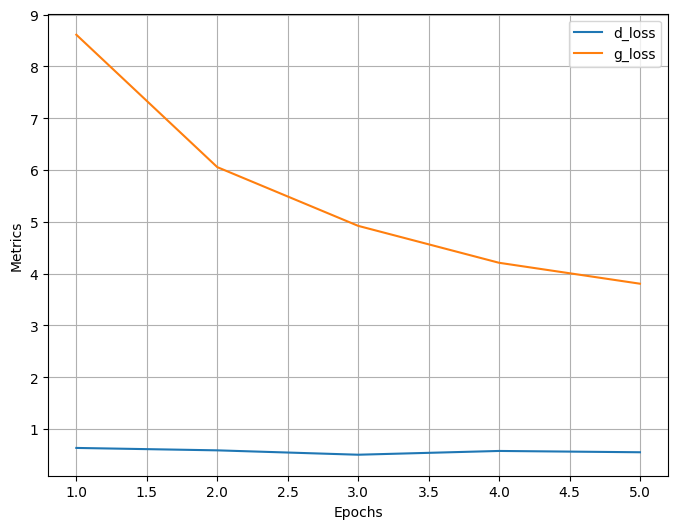

In [ ]:
log = Report(5) #25
for epoch in range(5)#25:
    N = len(dataloader)
    for i, images in enumerate(dataloader):
        real_data = images.to(device)
        fake_data = generator(torch.randn(len(real_data), 100, 1, 1).to(device)).to(device)
        fake_data = fake_data.detach()
        d_loss = discriminator_train_step(real_data, fake_data)
        fake_data = generator(torch.randn(len(real_data), 100, 1, 1).to(device)).to(device)
        g_loss = generator_train_step(fake_data)
        log.record(epoch+(1+i)/N, d_loss=d_loss.item(), g_loss=g_loss.item(), end='\r')
    log.report_avgs(epoch+1)
log.plot_epochs(['d_loss','g_loss'])

In [ ]:
# Initialize a report object to track training progress over 25 epochs
log = Report(25)

# Iterate over each epoch in the range of 25 epochs
for epoch in range(25):
    # Get the total number of batches in the dataloader
    N = len(dataloader)

    # Iterate over each batch of images in the dataloader
    for i, images in enumerate(dataloader):
        # Move the batch of real images to the specified device (e.g., GPU)
        real_data = images.to(device)

        # Generate a batch of fake images using the generator model and random noise as input
        fake_data = generator(torch.randn(len(real_data), 100, 1, 1).to(device)).to(device)

        # Detach the fake data to prevent gradients from flowing back to the generator
        fake_data = fake_data.detach()

        # Perform a discriminator training step using real and fake data
        d_loss = discriminator_train_step(real_data, fake_data)

        # Generate new fake data for the next discriminator training step
        fake_data = generator(torch.randn(len(real_data), 100, 1, 1).to(device)).to(device)

        # Perform a generator training step using the newly generated fake data
        g_loss = generator_train_step(fake_data)

        # Record and display the current epoch, discriminator loss, and generator loss
        log.record(epoch + (1 + i) / N, d_loss=d_loss.item(), g_loss=g_loss.item(), end='\r')

    # Report average losses at the end of each epoch
    log.report_avgs(epoch + 1)

# Plot the evolution of discriminator and generator losses across epochs
log.plot_epochs(['d_loss', 'g_loss'])


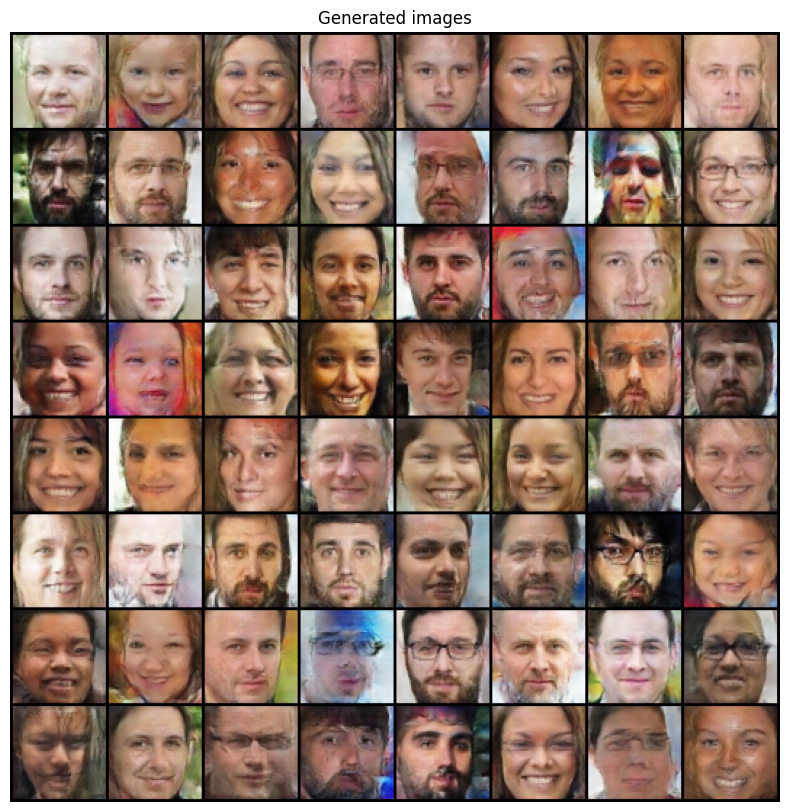

In [ ]:
generator.eval()
noise = torch.randn(64, 100, 1, 1, device=device)
sample_images = generator(noise).detach().cpu()
grid = vutils.make_grid(sample_images, nrow=8, normalize=True)
show(grid.cpu().detach().permute(1,2,0), sz=10, title='Generated images')